### Week 3
## Dynamic programming to solve MDPs

## Cleaning Robot Problem

The main characteristics of this world are the following:

- Discrete time and space
- Fully observable
- Infinite horizon
- Known Transition Model

<img src="https://drive.google.com/uc?id=1Yz6xnDuo6StlKzmj4eDqVYvZfOORBlBT"/>

The main goal for the robot in this task is to find the best way to reach the charging station.



## Introduction to Dynamic Programming (DP)

- Dynamic programming (DP) is used to compute optimal policies given a complete model of the environment
  - This model should be a Markov Decision Process (MDP)
  - In dynamic programming, the dynamics function, $P$ should be known
    - i.e $ P(s'|s, a)$ should be fully defined
    - What do we mean by this?
    - Well, basically when given a state and action, the model of the environment will give the probabilities for all possible next states and rewards


- In DP (Dynamic programming) the objective is to determine optimal policies using optimal value functions
  - In order to do that, we first calculate optimal value functions for each state
  - As a recap: value functions allow us to get an idea of how good each state is, in terms of giving highest accumulated reward
    - More formally, state-value functions are the "expected" future rewards starting at some state, $s$ and then following a specific policy
   - Action-value functions are the "expected" future rewards starting at some state $s$ and action $a$ and then following a specific policy
- So, that leads us to one question: how do we determine state-values and action-values?

## The policy iteration algorithm

use the policy iteration algorithm to find an optimal policy that maximizes the expected reward. No policy generates more reward than the optimal policy $\pi^∗$
. Policy iteration is guaranteed to converge and at convergence, the current policy and its utility function are the optimal policy and the optimal utility function. First of all, we define a policy
$\pi$ assigning an action to each state. We can assign random actions to this policy, it does not matter. Using the Bellman equation we can compute the expected utility of the policy. There is a good news. We do not really need the complete version of the Bellman equation which is:

$$V{(s)} = \ R{(s,a)} + \gamma \color{red}{\max_{a^\prime}} \sum_{s^\prime\in\text{S}} \big[P{(s^\prime|s,a)}  V{(s^\prime)}\big]$$

Since we have a policy and the policy associate to each state an action, we can get rid of the
 max
 operator and use a simplified version of the Bellman equation:

 $$V{(s)} = \ R{(s,\pi(s))} + \gamma \sum_{s^\prime\in\text{S}} \big[P{(s^\prime|s,\pi(s)}  V{(s^\prime)}\big]$$


Once we have evaluated the policy, we can improve it. Policy improvement is the second and last step of the algorithm. Our environment has a finite number of states, therefore a finite number of policies. Each iteration returns a better policy.

In [11]:
!wget -q https://github.com/mhd-medfa/IU-Reinforcement-Learning-22-lab/raw/main/week03-mdp/T.npy  -O T.npy

"wget" ­Ґ пў«пҐвбп ў­гваҐ­­Ґ© Ё«Ё ў­Ґи­Ґ©
Є®¬ ­¤®©, ЁбЇ®«­пҐ¬®© Їа®Ја ¬¬®© Ё«Ё Ї ЄҐв­л¬ д ©«®¬.


In [12]:
import numpy as np

class MDP:
  def __init__(self):
        #Starting state vector
        #The agent starts from (1, 1)
        self.states = np.array([[0.0, 0.0, 0.0, 0.0,
                                    0.0, 0.0, 0.0, 0.0,
                                    1.0, 0.0, 0.0, 0.0]])
        self.rewards = np.array([-0.04, -0.04, -0.04,  +1.0,
                                 -0.04,   0.0, -0.04,  -1.0,
                                 -0.04, -0.04, -0.04, -0.04])

        # Probabilities Transition matrix loaded from file
        #(It is too big to write here)
        self.transits = np.load("T.npy")
        #Generate the first policy randomly
        # Nan=Nothing, -1=Terminal, 0=Up, 1=Left, 2=Down, 3=Right
        self.policy = np.random.randint(0, 4, size=(12)).astype(np.float32)
        self.policy[5] = np.NaN
        self.policy[3] = self.policy[7] = -1

        #Utility vector
        self.values = np.array([0.0, 0.0, 0.0,  0.0,
                                0.0, 0.0, 0.0,  0.0,
                                0.0, 0.0, 0.0,  0.0])
        self.gamma = 0.999

        self.epsilon = 0.0001
        self.iteration = 0

  def policy_evaluation(self, shape=(3,4)):
    for s in range(12):
      if not np.isnan(self.policy[s]):
        self.states = np.zeros((1,12))
        self.states[0,s] = 1.0
        action = int(self.policy[s])
        self.values[s] = self.rewards[s] + self.gamma * np.sum(np.multiply(self.values, np.dot(self.states, self.transits[:,:,action])))
    return self.values

  def expected_action(self):
      """Return the expected action.

      It returns an action based on the
      expected utility of doing a in state s,
      according to T and u. This action is
      the one that maximize the expected
      utility.

      @return expected action (int)
      """
      actions = np.zeros(4)
      for action in range(4):
        #Expected utility of doing a in state s, according to T and u.
        actions[action] = np.sum(np.multiply(self.values, np.dot(self.states, self.transits[:,:,action])))
      return np.argmax(actions)

def print_policy(p, shape):
    """Printing utility.

    Print the policy actions using symbols:
    ^, v, <, > up, down, left, right
    * terminal states
    # obstacles
    """
    counter = 0
    policy_string = ""
    for row in range(shape[0]):
        for col in range(shape[1]):
            if(p[counter] == -1): policy_string += " *  "
            elif(p[counter] == 0): policy_string += " ^  "
            elif(p[counter] == 1): policy_string += " <  "
            elif(p[counter] == 2): policy_string += " v  "
            elif(p[counter] == 3): policy_string += " >  "
            elif(np.isnan(p[counter])): policy_string += " #  "
            counter += 1
        policy_string += '\n'
    print(policy_string)

In [13]:
mdp = MDP()

while True:
    mdp.iteration += 1
    #1- Policy evaluation
    u_old = mdp.values.copy()
    u = mdp.policy_evaluation()
    #Stopping criteria
    delta = np.absolute(u - u_old).max()
    if delta < mdp.epsilon * (1 - mdp.gamma) / mdp.gamma: break
    for s in range(12):
        if not np.isnan(mdp.policy[s]) and not mdp.policy[s]==-1:
            #2- Policy improvement
            mdp.states = np.zeros((1,12))
            mdp.states[0,s] = 1.0
            a = mdp.expected_action()
            mdp.policy[s] = a


    print_policy(mdp.policy, shape=(3,4))

print("=================== FINAL RESULT ==================")
print("Iterations: " + str(mdp.iteration))
print("Delta: " + str(delta))
print("Gamma: " + str(mdp.gamma))
print("Epsilon: " + str(mdp.epsilon))
print("===================================================")
print(u[0:4])
print(u[4:8])
print(u[8:12])
print("===================================================")
print_policy(mdp.policy, shape=(3,4))
print("===================================================")


 ^   <   >   *  
 ^   #   <   *  
 >   <   <   v  

 ^   >   >   *  
 ^   #   ^   *  
 <   <   ^   v  

 >   >   >   *  
 ^   #   ^   *  
 <   >   ^   <  

 >   >   >   *  
 ^   #   ^   *  
 ^   >   ^   <  

 >   >   >   *  
 ^   #   ^   *  
 ^   >   ^   <  

 >   >   >   *  
 ^   #   ^   *  
 ^   >   ^   <  

 >   >   >   *  
 ^   #   ^   *  
 ^   <   ^   <  

 >   >   >   *  
 ^   #   ^   *  
 ^   <   ^   <  

 >   >   >   *  
 ^   #   ^   *  
 ^   <   ^   <  

 >   >   >   *  
 ^   #   ^   *  
 ^   <   <   <  

 >   >   >   *  
 ^   #   ^   *  
 ^   <   <   <  

 >   >   >   *  
 ^   #   ^   *  
 ^   <   <   <  

 >   >   >   *  
 ^   #   ^   *  
 ^   <   <   <  

 >   >   >   *  
 ^   #   ^   *  
 ^   <   <   <  

 >   >   >   *  
 ^   #   ^   *  
 ^   <   <   <  

 >   >   >   *  
 ^   #   ^   *  
 ^   <   <   <  

 >   >   >   *  
 ^   #   ^   *  
 ^   <   <   <  

 >   >   >   *  
 ^   #   ^   *  
 ^   <   <   <  

 >   >   >   *  
 ^   #   ^   *  
 ^   <   <   <  

 >   >   >  

## Homework: The value iteration algorithm

Your task is to solve the Robot Cleaning problem using the Value Iteration algorithm.

1- Based on your understanding write down the pseudo-code for Value Iteration algorithm.

2- Complete the implementation for value iteration algorithm. Basically you need to only complete the `MDP.state_utility()` method, comment on your results.

3- Make sure to provide your detailed explanation for the result.

4- Explain in detail the results you got in comparison with the Policy Iteration algorithm in your own words based on your understanding.


**Note:** Your grade will be based on your understanding of the algorithm and your analysis to the results. Cheating will be punished by 50% deduction for the first time and will get 0 in the second time.

### Pseudo-code for Value Iteration Algorithm

    ValueIteration(MDP, epsilon):

    Initialize V(s) arbitrarily for all states s
    repeat

        delta = 0
        for each state s in MDP:
            v = V(s)
            V(s) = max_a ∑_s' P(s'|s,a)[R(s,a,s') + γV(s')]
            delta = max(delta, |v - V(s)|)

        until delta < epsilon

    return V


In [14]:
import numpy as np
import matplotlib.pyplot as plt

class MDP:
  def __init__(self):
        #Starting state vector
        #The agent starts from (1, 1)
        self.states = np.array([[0.0, 0.0, 0.0, 0.0,
                                    0.0, 0.0, 0.0, 0.0,
                                    1.0, 0.0, 0.0, 0.0]])
        self.rewards = np.array([-0.04, -0.04, -0.04,  +1.0,
                                 -0.04,   0.0, -0.04,  -1.0,
                                 -0.04, -0.04, -0.04, -0.04])
        self.num_states = 12

        # Probabilities Transition matrix loaded from file
        #(It is too big to write here)
        self.transits = np.load("T.npy")
        #Generate the first policy randomly
        # Nan=Nothing, -1=Terminal, 0=Up, 1=Left, 2=Down, 3=Right
        self.policy = np.random.randint(0, 4, size=(12)).astype(np.float32)
        self.policy[5] = np.NaN
        self.policy[3] = self.policy[7] = -1

        #Utility vector
        self.values = np.array([0.0, 0.0, 0.0,  0.0,
                                0.0, 0.0, 0.0,  0.0,
                                0.0, 0.0, 0.0,  0.0])
        self.gamma = 0.999

        self.epsilon = 0.0001
        self.iteration = 0
  def state_utility(self, s):
      """Return the state utility.

      @return the utility of the state
      """
      if not np.isnan(self.policy[s]):
        # If an action is defined for state s in the policy
        state_actions = self.transits[s, :, :]
        action_rewards = self.rewards + self.gamma * self.values
        action_utilities = np.sum(state_actions * action_rewards[:, None], axis=0)
        max_utility = np.max(action_utilities)
        return max_utility
      else:
        # If no action is defined for state s in the policy
        return 0


  def expected_action(self):
      """Return the expected action.

      It returns an action based on the
      expected utility of doing a in state s,
      according to T and u. This action is
      the one that maximize the expected
      utility.

      @return expected action (int)
      """
      actions = np.zeros(4)
      for action in range(4):
        #Expected utility of doing a in state s, according to T and u.
        actions[action] = np.sum(np.multiply(self.values, np.dot(self.states, self.transits[:,:,action])))
      return np.argmax(actions)

def generate_graph(utility_list):
    """Given a list of utility arrays (one for each iteration)
       it generates a matplotlib graph and save it as 'output.jpg'
    """
    name_list = ('(1,3)', '(2,3)', '(3,3)', '+1', '(1,2)', '#', '(3,2)', '-1', '(1,1)', '(2,1)', '(3,1)', '(4,1)')
    color_list = ('cyan', 'teal', 'blue', 'green', 'magenta', 'black', 'yellow', 'red', 'brown', 'pink', 'gray', 'sienna')
    counter = 0
    index_vector = np.arange(len(utility_list))
    for state in range(12):
        state_list = list()
        for utility_array in utility_list:
             state_list.append(utility_array[state])
        plt.plot(index_vector, state_list, color=color_list[state], label=name_list[state])
        counter += 1
    #Adjust the legend and the axis
    plt.legend(loc='upper center', bbox_to_anchor=(0.5, 0.4), ncol=3, fancybox=True, shadow=True)
    plt.ylim((-1.1, +1.1))
    plt.xlim((1, len(utility_list)-1))
    plt.ylabel('Utility', fontsize=15)
    plt.xlabel('Iterations', fontsize=15)
    plt.savefig("./output.jpg", dpi=500)

def print_policy(p, shape):
    """Printing utility.

    Print the policy actions using symbols:
    ^, v, <, > up, down, left, right
    * terminal states
    # obstacles
    """
    counter = 0
    policy_string = ""
    for row in range(shape[0]):
        for col in range(shape[1]):
            if(p[counter] == -1): policy_string += " *  "
            elif(p[counter] == 0): policy_string += " ^  "
            elif(p[counter] == 1): policy_string += " <  "
            elif(p[counter] == 2): policy_string += " v  "
            elif(p[counter] == 3): policy_string += " >  "
            elif(np.isnan(p[counter])): policy_string += " #  "
            counter += 1
        policy_string += '\n'
    print(policy_string)


=================== FINAL RESULT ==================
Iterations: 21
Delta: 5.5841296697778375e-08
Gamma: 0.999
Epsilon: 0.0001
[0.84881225 0.90630541 0.95748948 0.        ]
[0.797764   0.         0.69906187 0.        ]
[0.74042338 0.68951057 0.6453651  0.42192621]
 >   >   <   *  
 ^   #   ^   *  
 ^   <   <   <  



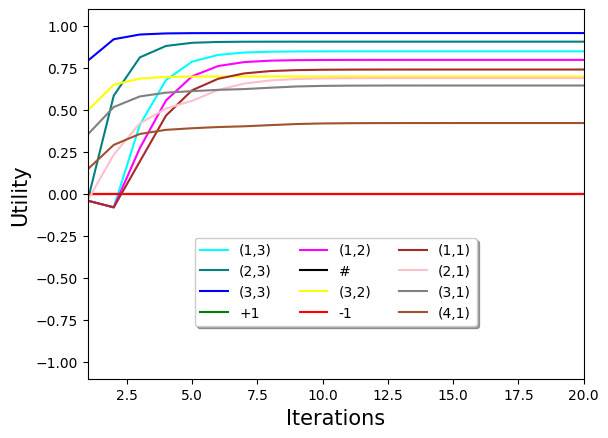

In [15]:
mdp = MDP()
#List containing the data for each iteation
graph_list = list()

while True:
    delta = 0
    # u = mdp.values
    u_old = mdp.values.copy()
    mdp.iteration += 1
    graph_list.append(u_old)
    for s in range(12):
        mdp.states = np.zeros((1,mdp.num_states))
        mdp.states[0,s] = 1.0
        mdp.values[s] = mdp.state_utility(s)
        u = mdp.values
        delta = max(delta, np.abs(u[s] - u_old[s])) #Stopping criteria
    if delta < mdp.epsilon * (1 - mdp.gamma) / mdp.gamma:
            print("=================== FINAL RESULT ==================")
            print("Iterations: " + str(mdp.iteration))
            print("Delta: " + str(delta))
            print("Gamma: " + str(mdp.gamma))
            print("Epsilon: " + str(mdp.epsilon))
            print("===================================================")
            print(u[0:4])
            print(u[4:8])
            print(u[8:12])
            print("===================================================")
            for ss in range(12):
              if not np.isnan(mdp.policy[ss]) and not mdp.policy[ss]==-1:
                  mdp.states = np.zeros((1,12))
                  mdp.states[0,ss] = 1.0
                  #2- Policy improvement
                  a = mdp.expected_action()
                  if a != mdp.policy[ss]: mdp.policy[ss] = a
            print_policy(mdp.policy, shape=(3,4))
            print("===================================================")

            break
generate_graph(graph_list)


#### Observing the results
The value function stabilizes approximately after 8 iterations. The policy derived from this iteration is deemed as the optimal policy.

#### Comparison between Value and Policy Iteration
Policy iteration algorithm exhibits quicker convergence, requiring fewer iterations compared to value iteration. Consequently, policy iteration generally concludes faster than value iteration.

In scenarios with numerous actions or when an initial policy is satisfactory, policy iteration is preferred. Conversely, in situations with a limited number of actions, value iteration may offer better performance.